In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import splitfolders

In [2]:
  import tensorflow as tf
  from tensorflow.keras.models import load_model
  from tensorflow.keras import layers, models
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
  from tensorflow.keras.utils import to_categorical
  from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
  from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
input_folder = 'C:\Retail_Classification_Project\DataSet'

# Output will be stored in "split_dataset" folder.
splitfolders.ratio(input_folder,
                   output="../Classification_Project/split_dataset",
                   seed=42,
                   ratio=(0.8, 0.1, 0.1)) 

# Set the path train,test,val folder path.

In [4]:


train_path = '../Classification_Project/split_dataset/train'
test_path = '../Classification_Project/split_dataset/test'
val_path = '../Classification_Project/split_dataset/val'


# Image resizing

In [5]:
img_size = (224, 224)
batch_size = 32

# APPLY AUGMENTATION

In [6]:
#Create datagen for train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest')


#Create datagen for test
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest')

#Create datagen for val
val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest')

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')


Found 11916 images belonging to 18 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 1509 images belonging to 18 classes.


In [9]:
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True )

Found 1496 images belonging to 18 classes.


# Extract the Classes from data

In [10]:
class_labels = train_generator.class_indices
print("Classes ",class_labels)
num_classes =len(class_labels)

Classes  {'Cake': 0, 'Candy': 1, 'Cereal': 2, 'Chips': 3, 'Chocolate': 4, 'Coffee': 5, 'Fish': 6, 'Honey': 7, 'Jam': 8, 'Milk': 9, 'Oil': 10, 'Pasta': 11, 'Rice': 12, 'Soda': 13, 'Sugar': 14, 'Tea': 15, 'Vinegar': 16, 'Water': 17}


# Build CNN Classification Model

In [11]:
model = models.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(*img_size, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.GlobalAveragePooling2D(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])


c:\Retail_Classification_Project\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 460,754 (1.76 MB)

 Trainable params: 459,794 (1.75 MB)

 Non-trainable params: 960 (3.75 KB)

# Create callback and Early stopping

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('Classification_test4_Best_Weight.keras', save_best_only=True)
]


# Model Training

In [14]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=26,
    callbacks=callbacks )


Epoch 1/26
373/373 ━━━━━━━━━━━━━━━━━━━━ 646s 2s/step - accuracy: 0.2566 - loss: 2.3756 - val_accuracy: 0.1009 - val_loss: 3.9859 - learning_rate: 0.0010
Epoch 2/26
373/373 ━━━━━━━━━━━━━━━━━━━━ 611s 2s/step - accuracy: 0.4024 - loss: 1.8784 - val_accuracy: 0.3743 - val_loss: 1.9417 - learning_rate: 0.0010
Epoch 3/26
373/373 ━━━━━━━━━━━━━━━━━━━━ 605s 2s/step - accuracy: 0.5136 - loss: 1.5500 - val_accuracy: 0.4098 - val_loss: 1.9836 - learning_rate: 0.0010
Epoch 4/26
373/373 ━━━━━━━━━━━━━━━━━━━━ 602s 2s/step - accuracy: 0.5999 - loss: 1.2610 - val_accuracy: 0.5107 - val_loss: 1.4779 - learning_rate: 0.0010
Epoch 5/26
373/373 ━━━━━━━━━━━━━━━━━━━━ 601s 2s/step - accuracy: 0.6773 - loss: 1.0148 - val_accuracy: 0.6116 - val_loss: 1.1770 - learning_rate: 0.0010
Epoch 6/26
373/373 ━━━━━━━━━━━━━━━━━━━━ 633s 2s/step - accuracy: 0.7348 - loss: 0.8325 - val_accuracy: 0.6197 - val_loss: 1.2865 - learning_rate: 0.0010
Epoch 7/26
373/373 ━━━━━━━━━━━━━━━━━━━━ 584s 2s/step - accuracy: 0.7821 - loss: 0.

#Save entire model (architecture + weights + optimizer state)

In [15]:
model.save("Classification_model_test4.h5")
model.save('Classification_model_test4.keras')

Print accuracy and validation accuracy values


In [16]:
print("Training Accuracy:", history.history['accuracy'])
print("Validation Accuracy:", history.history['val_accuracy'])


Training Accuracy: [0.25662973523139954, 0.4024001359939575, 0.5135951638221741, 0.599865734577179, 0.6773245930671692, 0.7348103523254395, 0.7821416854858398, 0.8198220729827881, 0.8522155284881592, 0.8705102205276489, 0.8840214610099792, 0.900469958782196, 0.9086942076683044, 0.9212822914123535, 0.9252265691757202, 0.9540953636169434, 0.9616482257843018, 0.965424656867981, 0.9658442139625549, 0.9673548340797424, 0.9688653945922852, 0.9695367813110352, 0.9690332412719727, 0.9699563384056091, 0.9733132123947144, 0.9727257490158081]
Validation Accuracy: [0.10093583166599274, 0.3743315637111664, 0.40975937247276306, 0.5106951594352722, 0.6116310358047485, 0.6196523904800415, 0.758689820766449, 0.8181818127632141, 0.8054812550544739, 0.8609625697135925, 0.6410427689552307, 0.8716577291488647, 0.8221924901008606, 0.7473261952400208, 0.8221924901008606, 0.9284759163856506, 0.9592245817184448, 0.9284759163856506, 0.9518716335296631, 0.9592245817184448, 0.970588207244873, 0.9485294222831726, 

# Plot the accuracy and loss

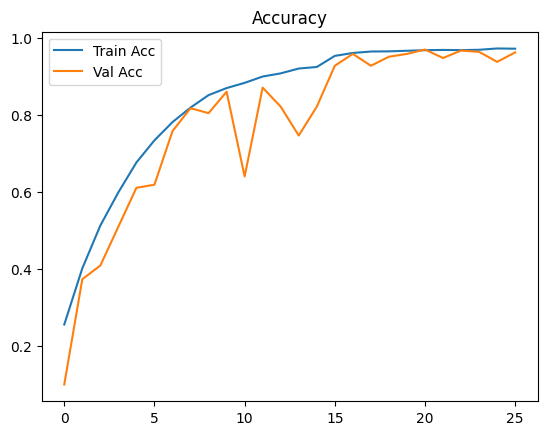

In [17]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")
plt.show()

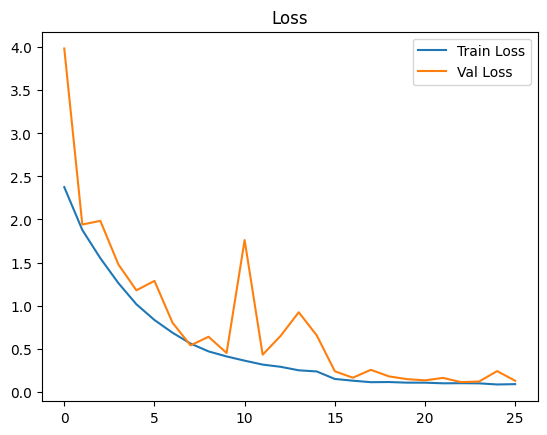

In [18]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

In [19]:
import sklearn


# Evaluation on Test Set

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

#print("Confusion Matrix:")
#print(confusion_matrix(y_true, y_pred))


48/48 ━━━━━━━━━━━━━━━━━━━━ 30s 621ms/step
Classification Report:
              precision    recall  f1-score   support

        Cake       0.99      1.00      0.99        87
       Candy       0.99      0.97      0.98        92
      Cereal       0.99      0.98      0.98        96
       Chips       1.00      0.99      0.99        89
   Chocolate       0.99      0.93      0.96        91
      Coffee       1.00      0.95      0.97        93
        Fish       0.89      1.00      0.94        56
       Honey       0.97      0.97      0.97        78
         Jam       0.96      0.99      0.97        98
        Milk       0.99      0.99      0.99        81
         Oil       0.99      1.00      0.99        71
       Pasta       0.93      0.99      0.96        85
        Rice       1.00      1.00      1.00        74
        Soda       0.99      0.94      0.97        88
       Sugar       0.97      0.97      0.97        60
         Tea       0.96      1.00      0.98        99
     Vinegar    

In [21]:
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Confusion Matrix:
[[87  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  1  0  1  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  1 94  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0 88  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0 85  0  1  0  0  0  0  3  0  1  0  0  0  0]
 [ 0  0  0  0  0 88  1  2  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 56  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 76  0  0  0  1  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0 97  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 80  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 71  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 84  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 74  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  3  0  0  0  0 83  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  0  1  0  0  0  0 58  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 99  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  1  0  0  1  0 75  1]
 [ 0  0  0  0

# Confusion Matrix  for CNN Model

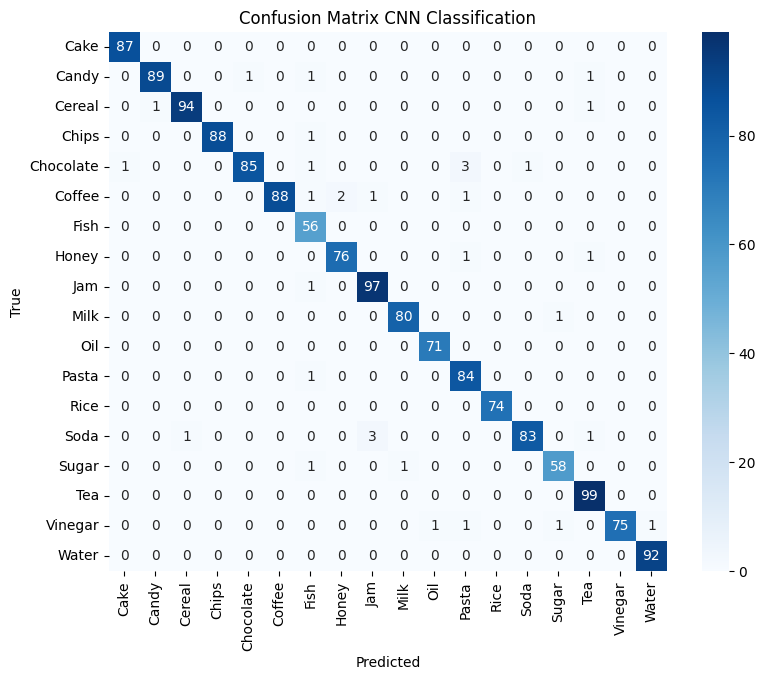

In [22]:
cm_cnn = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(9,7))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix CNN Classification")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()

In [23]:
y_scores = model.predict(test_generator)
print(y_scores)

48/48 ━━━━━━━━━━━━━━━━━━━━ 30s 627ms/step
[[1.0000000e+00 5.2130428e-10 3.8735008e-11 ... 2.4589597e-15
  5.7228208e-21 5.1476136e-18]
 [9.9772948e-01 3.9116227e-07 4.8493508e-05 ... 6.5453572e-04
  1.4316108e-06 6.0629056e-08]
 [9.9999785e-01 4.0929027e-10 1.9853010e-06 ... 2.3891686e-10
  7.0255385e-16 4.1522508e-15]
 ...
 [2.0295846e-16 5.4157918e-11 7.3690164e-13 ... 4.8269481e-15
  9.1925350e-13 9.9999928e-01]
 [1.8248385e-12 4.3370623e-08 3.0795651e-11 ... 2.5913055e-11
  1.0170781e-10 9.9999988e-01]
 [2.8919879e-13 1.5760305e-09 7.3778570e-12 ... 4.1380814e-12
  3.7484126e-12 9.9999988e-01]]


# Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


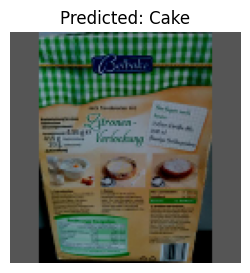

In [25]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import shutil

# --- Paths ---
base_dir_cnn= "C:\Retail_Classification_Project\Results"
input_dir_cnn= os.path.join(base_dir_cnn, "Input")
output_dir_cnn= os.path.join(base_dir_cnn, "Output")

# Create folders if they don't exist
os.makedirs(input_dir_cnn, exist_ok=True)
os.makedirs(output_dir_cnn, exist_ok=True)

# --- Load Image ---
img_path = "C:\Retail_Classification_Project\sampleImage\cake_313.jpg"
img_cnn = image.load_img(img_path, target_size=(128, 128))

# Copy image to input folder
shutil.copy(img_path, input_dir_cnn)

# --- Preprocess Image ---
img_array_cnn = image.img_to_array(img_cnn)
img_array_cnn = np.expand_dims(img_array_cnn, axis=0)
img_array_cnn = img_array_cnn / 255.0

# --- Prediction ---
prediction_cnn = model.predict(img_array_cnn)
class_idx = np.argmax(prediction_cnn)
predicted_class_cnn = list(train_generator.class_indices.keys())[class_idx]

# --- Display and Save Output ---
plt.figure(figsize=(3,3))
plt.imshow(img_cnn)
plt.axis("off")
plt.title(f"Predicted: {predicted_class_cnn}")

# Save output image
output_path_cnn= os.path.join(output_dir_cnn, f"Predicted_{predicted_class_cnn}.png")
plt.savefig(output_path_cnn, bbox_inches='tight')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


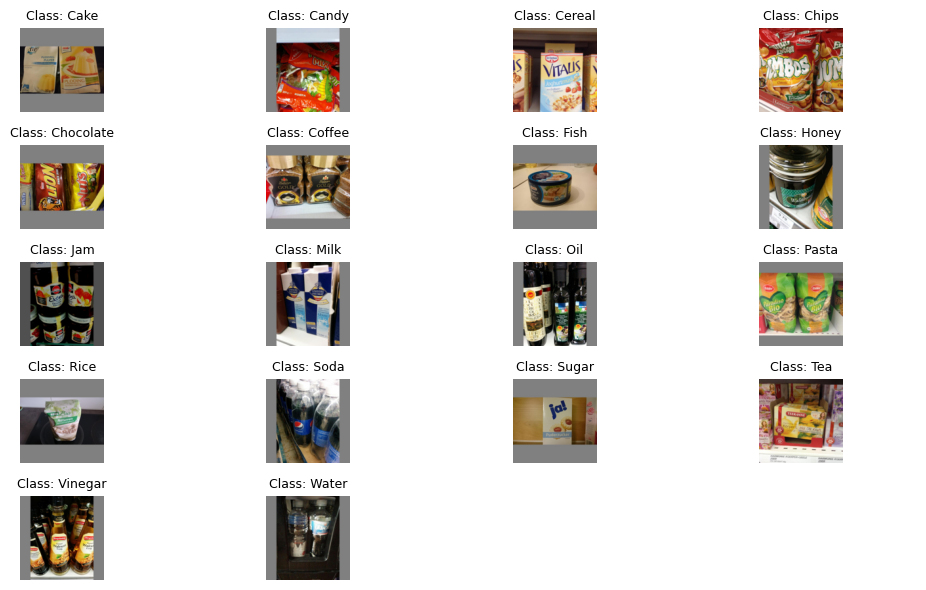

In [27]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Image size
img_size = (128, 128)
class_names_cnn = list(train_generator.class_indices.keys())

# Prediction function
def predict_image_cnn(img_path, img_size):
    img_cnn = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img_cnn) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    confidence = np.max(prediction) * 100  # confidence in %
    return class_names_cnn[class_idx], confidence

# Folder path
test_folder = r"C:\Retail_Classification_Project\DataSet"

images = []
titles = []

# Loop through each class
for class_name in class_names_cnn:
    class_folder = os.path.join(test_folder, class_name)
    if not os.path.exists(class_folder):
        continue

    # Pick the first valid image
    for file in os.listdir(class_folder):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(class_folder, file)
            try:
                # Predict class (still running for internal processing)
                pred_class, conf = predict_image_cnn(img_path, img_size)

                # Load image for display
                img_obj = Image.open(img_path).resize(img_size)

                # Append data (show only true label)
                images.append(img_obj)
                titles.append(f"Class: {class_name}")
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
            break  # one image per class

# Display in grid
n = len(images)
cols = 4
rows = (n + cols - 1) // cols  # auto-fit rows

fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < n:
        ax.imshow(images[i])
        ax.set_title(titles[i], fontsize=9)
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
